In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atividade 4

Considere o conjunto de dados abaixo, que mostra dados de consumo de diferentes <br>
produtos alimentícios nos 4 países do Reino Unido. Responda às seguintes perguntas<br>


Leitura dos dados

In [5]:
dados = pd.read_csv('../data/exc4.csv')

In [6]:
dados.head()

,Food,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209


## Item (a)
(a)   Apresente uma matriz de correlação entre os países. (informe o método utilizado para calcular a correlação).

In [7]:
dados_paises = dados.iloc[:, 1:]

In [8]:
dados_paises.head()

,England,Wales,Scotland,N Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209


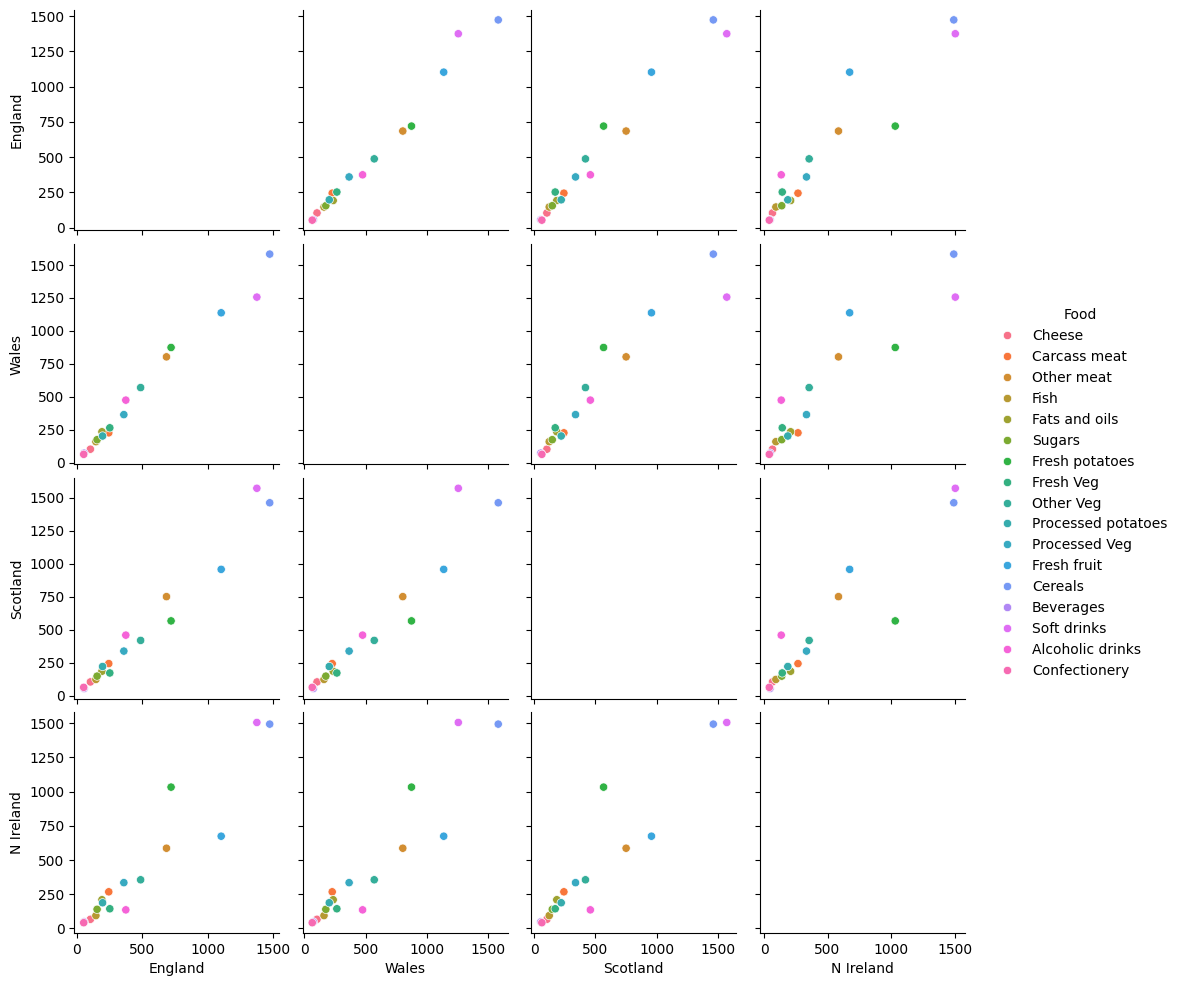

In [62]:
p = sns.pairplot(dados, hue='Food')
#p.figure.set_size_inches(6,6)

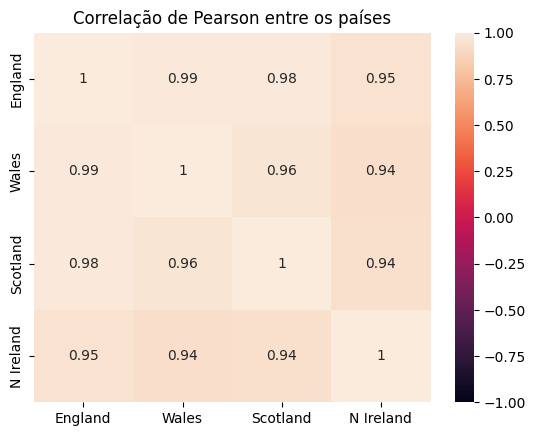

In [18]:
p = sns.heatmap(dados_paises.corr(), annot=True, vmin=-1, vmax=1)
p.set_title('Correlação de Pearson entre os países')
plt.show()

## Item (c)

Aplique o PCA para obter os componentes principais, e mostre o gráfico PC1 x PC2 (chamado score plot)

In [21]:
dados.head()

,Food,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209


In [50]:
dados_food = dados[['Food']].copy()

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Food       17 non-null     object
 1   England    17 non-null     int64 
 2   Wales      17 non-null     int64 
 3   Scotland   17 non-null     int64 
 4   N Ireland  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes


In [19]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=4)

In [32]:
dados_pca = pca.fit_transform(dados_paises)

In [53]:
dados_food['pca1'] = dados_pca[:,0]
dados_food['pca2'] = dados_pca[:,1]

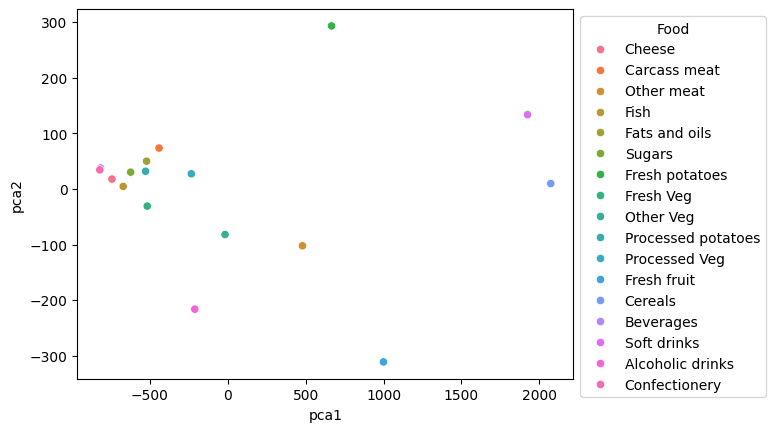

In [67]:
p = sns.scatterplot(dados_food, x='pca1', y='pca2', hue='Food')
p.set_title('')
#p.figure.set_size_inches(10,10)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()

Text(0.5, 1.0, 'Variância explicada pelas duas componentes: 99.00%')

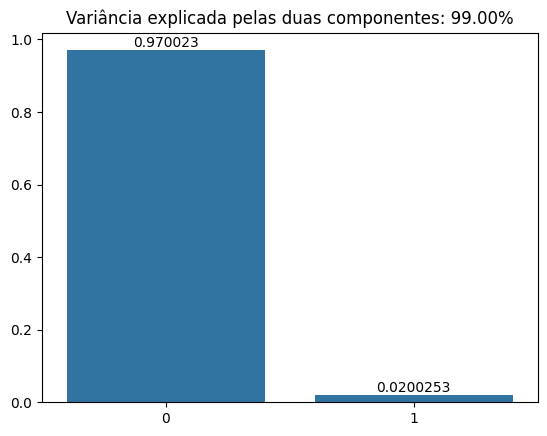

In [80]:
ax = sns.barplot(pca.explained_variance_ratio_)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title(f'Variância explicada pelas duas componentes: {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.2%}')

In [78]:
ax.containers[0][0]